In [1]:

import json

with open("data/all_gene_data.json") as f:
    gene_data = json.load(f)


In [2]:
import pandas as pd

gene_feature = pd.DataFrame()

In [5]:
gene_data.keys()

dict_keys(['0x', '1inch', 'bakerytoken', 'aave', 'aavegotchi', 'acala', 'adventure-gold', 'aergo', 'airswap', 'akropolis', 'alchemix', 'alchemy-pay', 'algorand', 'alien-worlds', 'aptos-launch-token', 'wrapped-solana', 'alpaca-finance', 'alpine-f1-team-fan-token', 'amber', 'amp-token', 'ampleforth-governance-token', 'anchor-protocol', 'ankr', 'anyswap', 'api3', 'aptos', 'aragon', 'ardor', 'arpa', 'arweave', 'as-roma-fan-token', 'atletico-madrid', 'auction', 'audius-wormhole', 'aurora-dao', 'auto', 'automata', 'concierge-io', 'axl-inu', 'axie-infinity', 'badger-dao', 'balancer', 'bancor', 'band-protocol', 'barnbridge', 'biswap', 'bifi', 'bella-protocol', 'qiswap', 'biconomy', 'matic-network', 'bitcoin-cash', 'eos', 'filecoin', 'zcoin', 'iotex', 'litecoin', 'near', 'ontology', 'xcdot', 'tezos', 'bitcoin-gold', 'bitshares', 'bittorrent', 'stox', 'bluzelle', 'bonfida', 'curve-dao-token', 'true-usd', 'btc-standard-hashrate-token', 'cartesi', 'cow-protocol', 'celer-network', 'tranchess', 'chi

In [136]:
feature_key_list = [
    "price_ave",
    "price_med",
    "price_dev",
    "price_min",
    "price_max",
    "price_max_change",
    "price_min_change",
    "price_sum_abs_change_rate",
    "price_short_dev",
    "price_range",
    "price_max_down",
    "price_max_mean",
    "volume_ave",
    "volume_med",
    "volume_dev",
    "volume_min",
    "volume_max",
    "volume_max_change",
    "volume_min_change",
    "volume_sum_abs_change_rate",
    "volume_short_dev",
    "volume_range",
    "volume_max_down",
    "volume_max_mean"] 

In [137]:
import statistics

def split_list(l, n):
    """
    リストをサブリストに分割する
    :param l: リスト
    :param n: サブリストの要素数
    :return: 
    """
    for idx in range(0, len(l), n):
        yield l[idx:idx + n]
 

def cul_feature(data):
    ave = statistics.mean(data)
    med = statistics.median(data)
    dev = statistics.pstdev(data)
    min_data = min(data)
    max_data = max(data)
    max_change = -(10 ** 10)
    min_change = 10 ** 10
    sum_change = 0
    div_data = list(split_list(data, 4))
    short_dev = 0
    data_range = max(data)-min(data)
    data_down_rate = (max(data) - min(data)) / (min(data) + 0.0000000000000000001)
    max_mean = max_data - ave
    for i in range(len(div_data)):
        short_dev += statistics.pstdev(div_data[i])
    short_dev = short_dev / len(div_data)
    for i in range(1,len(data)):
        temp_change = (data[i] - data[i-1]) / (data[i-1] + + 0.0000000000000000001)
        if max_change < temp_change:
            max_change = temp_change
        if min_change > temp_change:
            min_change = temp_change
        sum_change = abs(temp_change)
    
    feature_data = [ave, med, dev, min_data, max_data, max_change, min_change, sum_change, short_dev, data_range, data_down_rate, max_mean]
    return feature_data
        

In [138]:
for i, (key, value) in enumerate(gene_data.items()):
    if value["price"] != []:
        price_feature = cul_feature(value["price"])
        volume_feature = cul_feature(value["volume"])
        add_data = price_feature + volume_feature
        add_dataframe = pd.Series(add_data, index=feature_key_list)
        gene_feature[key] = add_dataframe

gene_feature = gene_feature.T

/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_37355/1164949566.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gene_feature[key] = add_dataframe
/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_37355/1164949566.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gene_feature[key] = add_dataframe
/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_37355/1164949566.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

In [139]:
import numpy as np

def remove_outliers_index(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 30 * iqr
    upper_bound = q3 + 30 * iqr
    index_list = set()
    for i, value in enumerate(data):
        if value > upper_bound:
            index_list.add(i)    
    return index_list

In [140]:
def format_symbol_list(data, out):
    now_num = 0
    for i in range(len(out)):
        data.pop(out[i]-now_num)
        now_num +=1
    return data

In [141]:
key_data = list(gene_feature.index.values)

In [142]:
out_index = set()

for i, (key, value) in enumerate(gene_feature.items()):
    bad = remove_outliers_index(value)
    out_index = out_index | bad

In [143]:
del_key_data = format_symbol_list(key_data, list(out_index))

In [144]:
format_gene_feature = pd.DataFrame()

for i, (key, value) in enumerate(gene_feature.items()):
    temp_list = []
    temp_key = []
    for j, (keys, values) in enumerate(value.items()):
        if j not in out_index:
            temp_list.append(values)
            temp_key.append(keys)
    temp_series = pd.Series(temp_list, index=temp_key)
    format_gene_feature[key] = temp_series


In [145]:
stn_gene_feature = format_gene_feature.iloc[:, :].apply(lambda x: (x-x.mean())/x.std(), axis=0)
stn_gene_feature

,price_ave,price_med,price_dev,price_min,price_max,price_max_change,price_min_change,price_sum_abs_change_rate,price_short_dev,price_range,...,volume_dev,volume_min,volume_max,volume_max_change,volume_min_change,volume_sum_abs_change_rate,volume_short_dev,volume_range,volume_max_down,volume_max_mean
0x,-0.336998,-0.336030,-0.332279,-0.329808,-0.341658,0.293221,-0.008612,-1.194300,-0.322039,-0.339089,...,-0.384156,-0.335554,-0.355130,-0.413919,-1.096280,-0.487524,-0.389900,-0.351319,-0.331337,-0.340023
1inch,-0.327391,-0.326582,-0.330676,-0.317118,-0.336350,-0.960360,1.049254,0.562404,-0.336014,-0.343355,...,0.131500,-0.180234,-0.065782,-0.628353,0.877407,-0.111539,-0.067501,-0.061643,-0.318759,-0.083046
bakerytoken,-0.303413,-0.309598,-0.215806,-0.314758,-0.270708,1.502266,-0.321823,-0.610161,-0.247689,-0.201335,...,0.282472,-0.304656,0.304855,-0.589145,-0.335872,-0.453946,0.209988,0.318818,-0.073887,0.309024
aavegotchi,-0.243231,-0.241470,-0.275022,-0.228733,-0.258134,-0.825418,0.677025,-0.987814,-0.288111,-0.281958,...,-0.399265,-0.124959,-0.382867,-0.801776,-0.343409,-0.405254,-0.389037,-0.385644,-0.389961,-0.373617
acala,-0.372941,-0.372538,-0.345946,-0.372065,-0.374128,0.562022,0.239344,-0.421099,-0.362589,-0.357563,...,-0.406595,-0.412277,-0.401665,-0.207689,-0.559992,2.238827,-0.437778,-0.396402,-0.139861,-0.379316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
woo-network,-0.298796,-0.304847,-0.198733,-0.318462,-0.290257,-0.110772,-0.207532,2.565536,-0.284545,-0.239848,...,-0.243251,-0.270048,-0.165175,-0.556285,1.157332,-0.424744,-0.297746,-0.160088,-0.300731,-0.141636
wrapped-nxm,6.661478,6.909178,3.744631,7.306016,5.735207,-0.912988,1.149475,-1.048485,4.378486,3.462087,...,-0.454655,-0.388349,-0.437994,-0.585999,0.649652,0.615617,-0.496208,-0.434035,-0.337293,-0.412454
yield-guild-games,-0.325127,-0.327642,-0.266490,-0.330160,-0.306305,2.706641,-1.358970,-1.004234,-0.288395,-0.260555,...,-0.291969,-0.191232,-0.288921,-0.529642,0.788443,-0.540245,-0.285506,-0.288198,-0.363826,-0.282214
zcash,3.845241,3.815786,3.067322,3.847190,3.626863,-0.734594,1.046593,0.077486,2.203622,3.163448,...,0.148514,1.071727,0.031457,-0.872370,1.956141,0.526883,0.572846,0.000820,-0.390951,-0.100422


In [146]:
main_ind_v = [[0.3369708882638471,
  0.33480856071443754,
  0.33912249102870734,
  0.32520899825785005,
  0.3430794085573052,
  -0.03866107151218766,
  0.047635468520500844,
  0.045644241213495244,
  0.33939836697710873,
  0.33435929848762114,
  0.016543012538205046,
  0.32055201401128525,
  0.11498518694003595,
  0.1149811921225748,
  0.10209954407517997,
  0.10848154973624698,
  0.09919488081371561,
  -0.03692073197357963,
  0.09013786718980285,
  0.03855359938601044,
  0.10431493201715689,
  0.09833355304453055,
  -0.034844393009803944,
  0.09385896553824755],
 [-0.10957165607837067,
  -0.10904918161636873,
  -0.10808420387729893,
  -0.10451545899916585,
  -0.10999567826331619,
  -0.01937019471769873,
  0.05606996680137382,
  -0.0332180718177019,
  -0.11064211501051613,
  -0.1070892033886722,
  -0.018604522142257458,
  -0.10108917228803214,
  0.34834468591151263,
  0.3221229849884666,
  0.3504413684843421,
  0.27569370038963453,
  0.34446342730625135,
  -0.04779014041475656,
  0.06075633692605274,
  -0.03273875125181298,
  0.3489104466784593,
  0.34322905437663725,
  -0.046046631651951095,
  0.3334811859002857],
 [-0.010507891488087024,
  -0.012908209330106567,
  0.016141728813236916,
  -0.0133804007927955,
  0.023082867156602162,
  0.44552914867011817,
  -0.30949546255441873,
  0.18948482150750026,
  0.009066032833643288,
  0.03815509975238579,
  0.31674600050307494,
  0.05797931270955969,
  -0.0018157036952028945,
  -0.04687584246567493,
  0.07548006739969679,
  -0.10025388763413638,
  0.10909335162223753,
  0.44276383733127517,
  -0.2685192834812828,
  0.23442700367956265,
  0.04112862785855404,
  0.11196413504356585,
  0.42569896379471706,
  0.12222558542896975]]

In [147]:
# import sklearn #機械学習のライブラリ
# from sklearn.decomposition import PCA #主成分分析器

# pca = PCA()
# pca.fit(stn_gene_feature)
# # データを主成分空間に写像
# feature = pca.transform(stn_gene_feature)


## 固有値ベクトルからデータの生成

In [162]:
import numpy as np

feature_dataframe = pd.DataFrame({"P1": [], "P2": [], "P3": []})
temp = []

for i, value in enumerate(stn_gene_feature.values):
    p1 = np.dot(np.array(value), np.array(main_ind_v[0]).reshape(-1, 1))
    p2 = np.dot(np.array(value), np.array(main_ind_v[1]).reshape(-1, 1))
    p3 = np.dot(np.array(value), np.array(main_ind_v[2]).reshape(-1, 1))

    key = stn_gene_feature.index.values
    temp_value = pd.DataFrame({"P1": p1, "P2": p2, "P3": p3}, index=[key[i]])
    feature_dataframe = pd.concat([feature_dataframe, temp_value])
    temp.append([p1[0], p2[0], p3[0]])

feature = np.array(temp)

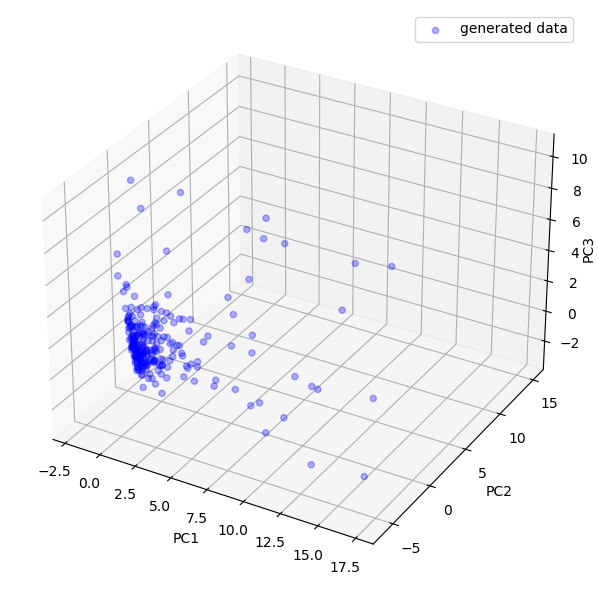

In [164]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt


# 第一主成分と第二主成分でプロットする
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': '3d'})

ax.scatter(feature[:, 0], feature[:, 1], feature[:, 2], alpha=0.3, color="b", label="generated data")

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3", labelpad=-3, rotation=90)

# 凡例の表示
ax.legend()

plt.tight_layout()
plt.show()


[[-1.35566742e+00 -6.25248424e-01 -6.07867788e-01]
 [-7.21797352e-01  3.49692034e-01 -1.65359484e+00]
 [-6.18019080e-01  7.03798309e-01  1.12958617e+00]
 [-9.81478336e-01 -5.48118215e-01 -1.69663399e+00]
 [-1.30083797e+00 -8.57368689e-01  4.29557113e-01]
 [-5.24826166e-01 -5.80935978e-01  2.33703476e+00]
 [-1.43783078e+00 -9.48328067e-01  5.45535139e-01]
 [-1.40092553e+00 -1.17289356e+00  1.24674762e+00]
 [-1.30040590e+00 -7.90540420e-01  1.00389492e+00]
 [ 8.47236697e+00 -3.77992395e+00  1.46299092e-02]
 [-1.05742753e+00  2.18546535e-01  1.27470141e-01]
 [ 5.85446449e-01  4.41336743e+00 -1.74068189e+00]
 [-1.24926891e+00 -6.02278766e-01 -8.06022137e-01]
 [-1.47667906e+00 -1.09341026e+00  1.96186872e+00]
 [-1.42744634e+00 -8.80571117e-01  1.88832769e-01]
 [-5.74140108e-01 -1.27049094e+00 -7.66596055e-02]
 [-1.63046247e+00 -9.84080462e-01  1.66869750e-01]
 [-1.35846017e+00 -6.27178970e-01 -7.19998372e-01]
 [-3.37052388e-02 -9.45051189e-01 -4.22823022e-01]
 [-1.49309048e+00 -1.13493257e+

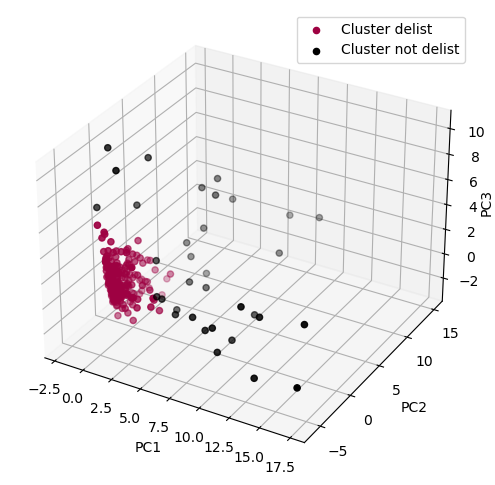

In [165]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

target = feature[:, [0,1,2]]

print(target)
dbscan = DBSCAN(eps=2.0, min_samples=10)
labels = dbscan.fit_predict(target)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': '3d'})

# クラスタごとにプロット
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:  # 外れ値
        color = 'k'  # 黒色
    mask = (labels == label)
    if label == -1:
        label = "not delist"
    else:
        label = "delist"
    ax.scatter(target[mask, 0], target[mask, 1], target[mask, 2], c=[color], label=f'Cluster {label}')

# グラフの設定
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3", labelpad=-3, rotation=90)
ax.legend()
plt.show()

In [152]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [153]:

good_key = []

for i in range(len(del_key_data)):
    if list(labels)[i] == -1:
        good_key.append(del_key_data[i])

In [158]:
len(good_key)

34

In [160]:
ans = []

for i, value in enumerate(labels):
    if value == -1:
        ans.append(i)

In [161]:
len(ans)

34